<hr style="height: 1px;">
<i>This notebook was authored by the 8.S50x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Guided Problem Set 12: Higgs Search Part III </h1>


<a name='section_12_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P12.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
     <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_12_1">P12.1 Machine Learning for the Higgs Boson Search Part I</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problem_12_1">P12.1 Problems</a></td>
    </tr>   
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_12_2">P12.2 Machine Learning for the Higgs Boson Search Part II</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problem_12_2">P12.2 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_12_3">P12.3 Machine Learning for the Higgs Boson Search Part III</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problem_12_3">P12.3 Problems</a></td>
    </tr>
</table>



<h3>Learning Objectives</h3>

In this Pset, we apply Machine Learning to the Higgs Boson search. We continue with the same data set used in previous Psets.

<h3>Data</h3>

>description: Higgs to 4 Leptons with CMS Open data from the Large Hadron Collider<br>
>source: https://zenodo.org/record/8034556 <br>
>attribution: Philip Harris (CMS Collaboration), DOI:10.5281/zenodo.8034556


In [1]:
#>>>RUN: P12.0-runcell00

!git init
!git remote add -f origin https://github.com/mitx-8s50/nb_LEARNER/
!git config core.sparseCheckout true
!echo 'P09' >> .git/info/sparse-checkout
!git pull origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
Updating origin
remote: Enumerating objects: 742, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 742 (delta 55), reused 52 (delta 52), pack-reused 625 (from 3)
Receiving objects: 100% (742/742), 37.42 MiB | 10.27 MiB/s, done.
Resolving deltas: 100% (348/348), done.
From https://github.com/mitx-8s50/nb_LEARNER
 * [new branch]      Alex       -> origin/Alex
 * [new branch]      main       -> o

In [2]:
#>>>RUN: P12.0-runcell01

# NOTE: some files are too large to include in the original repository, so you must download them from here:
# https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAXOXeEO9Bl_W6BUhV61kFpa?dl=0
#
# Ways to download:
#     1. Copy/paste the link (replace =0 with =1 to download automatically)
#     2. Use the wget commands below (works in Colab, but you may need to install wget if using locally)
#
# Location of files:
#     Move the files to the directory data/P09/MC
#
# Using wget: (works in Colab)
#     Upon downloading, the code below will move them to the appropriate directory

!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AADnJ6f0zzYekvFunRpH13Gma/zzto2mu2e2011.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAgZQdH4nWP9dYUmDLWXfhXa/zzto2mu2e2012.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AADepq5NkiLgh0uaij8P9p1Ka/zzto4e2011.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAA4FHGuNlPcfXHgwCcqZAyva/zzto4e2012.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAxiJAH_89oEYYvfMpFdtq4a/zzto4mu2011.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAD6lR-feTLWa1-GvYCsy8N5a/zzto4mu2012.csv?dl=0
!mv zzto2mu2e2011.csv?dl=0 data/P09/MC/zzto2mu2e2011.csv
!mv zzto2mu2e2012.csv?dl=0 data/P09/MC/zzto2mu2e2012.csv
!mv zzto4e2011.csv?dl=0 data/P09/MC/zzto4e2011.csv
!mv zzto4e2012.csv?dl=0 data/P09/MC/zzto4e2012.csv
!mv zzto4mu2011.csv?dl=0 data/P09/MC/zzto4mu2011.csv
!mv zzto4mu2012.csv?dl=0 data/P09/MC/zzto4mu2012.csv

--2025-03-08 14:14:33--  https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AADnJ6f0zzYekvFunRpH13Gma/zzto2mu2e2011.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fo/203hqqiddz5r6njwo3yhi/AJ_rWAuU0pTl4Uxa09RUBlk/zzto2mu2e2011.csv?rlkey=5kh4rrsa2qv00xjzv53w0fhb7&dl=0 [following]
--2025-03-08 14:14:34--  https://www.dropbox.com/scl/fo/203hqqiddz5r6njwo3yhi/AJ_rWAuU0pTl4Uxa09RUBlk/zzto2mu2e2011.csv?rlkey=5kh4rrsa2qv00xjzv53w0fhb7&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb69e9d6c210e7c6309b15d0032.dl.dropboxusercontent.com/cd/0/inline/CleFT5cvZTTgOuLaD-FXKuFiHnWSACw4TrQWNUwf6oGxY6qxdRN0_GYCln0WAjhHEYgP6NTsLLuLLmamn0yjmeJnHv5RocXvLiHVlH_tRXdceoqOuG_ek2AyMDYLESUgBzQ3zTmswVjd2H-9kNbDlNrF/file# [follo

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.

In [3]:
#>>>RUN: P12.0-runcell02

!pip install lmfit
!pip install dcor
!pip install torch
!pip install sklearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207

In [24]:
#>>>RUN: P12.0-runcell03

import numpy as np               #https://numpy.org/doc/stable/
import matplotlib.pyplot as plt  #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import pandas as pd              #https://pandas.pydata.org/docs/user_guide/index.html
from scipy import stats
import scipy.optimize as optimize
import lmfit

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [25]:
#>>>RUN: P12.0-runcell04

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title


<h3>Loading Data and Defining Relevant Functions Used Previously</h3>

Run all cells below before continuing. You will have to complete some cells based on your work in previous Psets. These cells will be indicated below.

In [26]:
#>>>RUN: P12.0-runcell05

## some scale factors and constants relevant to the data

## mass squared of muon: m_muon^2 (in GeV)
sqm1 = (0.105658) * (0.105658)
## mass squared of electron: m_e^2 (in GeV)
sqme = (0.0005109989) * (0.0005109989)
## mass of Z boson (in GeV)
mZ = 91.1876


## constants for the scale factor of MC. The MC is produced at a certain cross section
## with a certain number of events. To increase statistics, the event numbers generated are usually very large,
## therefore a scale factor is needed to apply on the MC to make them agree with data.
## Scale factor for each MC component is: lumi * xsec / nevt, as provided below

## Luminosity of each year in pb
lumi12 = 11580.
lumi11 = 2330.

## MC cross section of each process
xsecZZ412 = 0.107
xsecZZ2mu2e12 = 0.249
xsecZZ411 = 0.093
xsecZZ2mu2e11 = 0.208

xsecTTBar12 = 200.
xsecTTBar11 = 19.504

xsecDY5012 = 2955.
xsecDY1012 = 10.742
xsecDY5011 = 2475.
xsecDY1011 = 9507.

scalexsecHZZ12 = 0.0065
scalexsecHZZ11 = 0.0057

## Number of MC Events generated for each process
nevtZZ4mu12 = 1499064
nevtZZ4e12 = 1499093
nevtZZ2mu2e12 = 1497445
nevtHZZ12 = 299973
nevtTTBar12 = 6423106
nevtDY5012 = 29426492
nevtDY1012 = 6462290

nevtZZ4mu11 = 1447136
nevtZZ4e11 = 1493308
nevtZZ2mu2e11 = 1479879
nevtHZZ11 = 299683
nevtTTBar11 = 9771205
nevtDY5011 = 36408225
nevtDY1011 = 39909640


labels = ['$m_{H}$ = 125 GeV', r'ZZ $\rightarrow$ 4l', 'Z/$\gamma^{*}$ + X', r'$t\bar{t}$']
colors = ['r','b','g','gray']

#now we compute the event weights
scales_higgs = [lumi11*scalexsecHZZ11/nevtHZZ11, lumi12*scalexsecHZZ12/nevtHZZ12]
scales_zz = [lumi11*xsecZZ411/nevtZZ4mu11, lumi11*xsecZZ2mu2e11/nevtZZ2mu2e11, lumi11*xsecZZ411/nevtZZ4e11,\
             lumi12*xsecZZ412/nevtZZ4mu12, lumi12*xsecZZ2mu2e12/nevtZZ2mu2e12, lumi12*xsecZZ412/nevtZZ4e12]
scales_dy = [lumi11*xsecDY1011/nevtDY1011, lumi11*xsecDY5011/nevtDY5011, \
             lumi12*xsecDY1012/nevtDY1012, lumi11*xsecDY5012/nevtDY5012]
scales_tt = [lumi11*xsecTTBar11/nevtTTBar11, lumi12*xsecTTBar12/nevtTTBar12]

In [27]:
#>>>RUN: P12.0-runcell06

### open the files ###
# read datalist of each year and combine to one

def loaddata():
    data_year  = [pd.read_csv('data/P09/clean_data_2011.csv',index_col=None, header=0)]
    data_year += [pd.read_csv('data/P09/clean_data_2012.csv',index_col=None, header=0)]
    pdata = pd.concat(data_year,axis=0,ignore_index=True)
    return pdata

data=loaddata()

In [28]:
#>>>RUN: P12.0-runcell07

## ZZ*
#NOTE: these zz* files are too large to include the original repository, so you must download them here:
#https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAXOXeEO9Bl_W6BUhV61kFpa?dl=0
#Run cell P10.6-runcell01 to do this

def loadMC():
    # read MClist of each process and each year
    mc_higgs_11 = pd.read_csv('data/P09/MC/higgs2011.csv',index_col=None, header=0)
    mc_higgs_12 = pd.read_csv('data/P09/MC/higgs2012.csv',index_col=None, header=0)
    ## Drell-Yan
    mc_dy10_11 = pd.read_csv('data/P09/MC/dy1050_2011.csv',index_col=None, header=0)
    mc_dy50_11 = pd.read_csv('data/P09/MC/dy50_2011.csv',index_col=None, header=0)
    mc_dy10_12 = pd.read_csv('data/P09/MC/dy1050_2012.csv',index_col=None, header=0)
    mc_dy50_12 = pd.read_csv('data/P09/MC/dy50_2012.csv',index_col=None, header=0)
    ## ttbar
    mc_ttbar_11 = pd.read_csv('data/P09/MC/ttbar2011.csv',index_col=None, header=0)
    mc_ttbar_12 = pd.read_csv('data/P09/MC/ttbar2012.csv',index_col=None, header=0)
    ##zz
    mc_zz4mu_11 = pd.read_csv('data/P09/MC/zzto4mu2011.csv',index_col=None, header=0)
    mc_zz2mu2e_11 = pd.read_csv('data/P09/MC/zzto2mu2e2011.csv',index_col=None, header=0)
    mc_zz4e_11 = pd.read_csv('data/P09/MC/zzto4e2011.csv',index_col=None, header=0)
    mc_zz4mu_12 = pd.read_csv('data/P09/MC/zzto4mu2012.csv',index_col=None, header=0)
    mc_zz2mu2e_12 = pd.read_csv('data/P09/MC/zzto2mu2e2012.csv',index_col=None, header=0)
    mc_zz4e_12 = pd.read_csv('data/P09/MC/zzto4e2012.csv',index_col=None, header=0)

    # create a combined list of MC
    mc_higgs = [mc_higgs_11, mc_higgs_12]
    mc_zz = [mc_zz4mu_11, mc_zz2mu2e_11, mc_zz4e_11, mc_zz4mu_12, mc_zz2mu2e_12, mc_zz4e_12]
    mc_dy = [mc_dy10_11, mc_dy50_11, mc_dy10_12, mc_dy50_12]
    mc_tt = [mc_ttbar_11, mc_ttbar_12]

    out_mc_sig = pd.concat(mc_higgs,axis=0,ignore_index=True)
    out_mc_bkg_zz = pd.concat(mc_zz,axis=0,ignore_index=True)
    out_mc_bkg_dy = pd.concat(mc_dy,axis=0,ignore_index=True)
    out_mc_bkg_tt = pd.concat(mc_tt,axis=0,ignore_index=True)

    ## For Selections:
    out_mc_all = [mc_higgs, mc_zz, mc_dy, mc_tt]
    return out_mc_all,out_mc_sig,out_mc_bkg_zz,out_mc_bkg_dy,out_mc_bkg_tt

mc_all,mc_sig,mc_bkg_zz,mc_bkg_dy,mc_bkg_tt=loadMC()

In [29]:
#>>>RUN: P12.0-runcell08

#This is the header of the csv file:
#Run,Event,PID1,Q1,E1,px1,py1,pz1,eta1,phi1,PID2,Q2,E2,px2,py2,pz2,eta2,phi2,PID3,Q3,E3,px3,py3,pz3,eta3,phi3,PID4,Q4,E4,px4,py4,pz4,eta4,phi4
def ReadEntries(lis):
    return lis['PID1'],lis['Q1'],lis['E1'],lis['px1'],lis['py1'],lis['pz1'],lis['eta1'],lis['phi1'], \
    lis['PID2'],lis['Q2'],lis['E2'],lis['px2'],lis['py2'],lis['pz2'],lis['eta2'],lis['phi2'], \
    lis['PID3'],lis['Q3'],lis['E3'],lis['px3'],lis['py3'],lis['pz3'],lis['eta3'],lis['phi3'], \
    lis['PID4'],lis['Q4'],lis['E4'],lis['px4'],lis['py4'],lis['pz4'],lis['eta4'],lis['phi4']

def pt(px, py):
    return np.sqrt(px**2 + py**2)

def invMass(E, px, py, pz):
    return np.sqrt(E**2 - (px**2 + py**2 + pz**2))

def InvMass_4l(lists):   ### faster way to get the 4l-system invMass directly from the list, as you may repeately run it for the final plot###
    E_tot = lists['E1'] + lists['E2'] + lists['E3'] + lists['E4']
    px_tot = lists['px1'] + lists['px2'] + lists['px3'] + lists['px4']
    py_tot = lists['py1'] + lists['py2'] + lists['py3'] + lists['py4']
    pz_tot = lists['pz1'] + lists['pz2'] + lists['pz3'] + lists['pz4']
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

<h3>Complete Cell Below Based on Previous Work</h3>


In [30]:
#>>>RUN: P12.0-runcell09

def select_pairs(PID1,PID2,PID3,m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3,upperMinMass,lowerMinMass):
    ### 2mu2e event, only one combination c3

    ### 2mu2e event, only one combination c2

    ### 4mu or 4e event, 3 different combination
  ### Selection Criteria 1
    ### 2mu2e event, combination c3
    NotFind=True
    if (abs(PID1) != PID2 and abs(PID1) != abs(PID3)):
        NotFind=False
        m_z1 = m_z1_c3
        m_z2 = m_z2_c3
        if max(m_z1,m_z2) < upperMinMass:
            return 0
        if min(m_z1,m_z2) < lowerMinMass:
            return 0
    if (abs(PID1) != PID2 and abs(PID1) == abs(PID3)):
        NotFind=False
        m_z1 = m_z1_c2
        m_z2 = m_z2_c2
        if max(m_z1,m_z2) < upperMinMass:
            return 0
        if min(m_z1,m_z2) < lowerMinMass:
            return 0
    if NotFind:
        ls=[m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3]
        if max(ls) < upperMinMass:
            return 0
        if min(ls) < lowerMinMass:
            return 0
    return 1

In [31]:
#>>>RUN: P12.0-runcell10

def obj(pid,px,py,eta):  ## object selection for a single object
    pt_obj = pt(px,py)
    if (np.abs(pid) == 13 and pt_obj > 5.) or (np.abs(pid) == 11 and pt_obj > 7.):## requires electrons and muons to have transverse momenta above certain level
        return 1
    else:
        return 0

def objsel(lis):  ## Create column indicating whether this event passes the object selection
    pass_obj = []
    for row in lis.itertuples():   ## loop over each event(each row)
        pass_obj.append(obj(row.PID1,row.px1,row.py1,row.eta1) and obj(row.PID2,row.px2,row.py2,row.eta2) and obj(row.PID3,row.px3,row.py3,row.eta3) and obj(row.PID4,row.px4,row.py4,row.eta4))
    lis['PassObj'] = pass_obj

<h3>Complete Cell Below Based on Previous Work</h3>


In [32]:
#>>>RUN: P12.0-runcell11

def evt(PID1,Q1,E1,px1,py1,pz1,PID2,Q2,E2,px2,py2,pz2,PID3,Q3,E3,px3,py3,pz3,PID4,Q4,E4,px4,py4,pz4):

    if PID1+PID2+PID3+PID4 != 0: #Charge conservation
        return 0

    ### All Pairwise Mass combinations
    ##c1
    m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
    m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
    ##c2
    m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
    m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
    ##c3
    m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
    m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))

    ###NOTE: IF YOU DID NOT PREVIOUSLY DEFINE THE `lowerMinMass` and `upperMinMass`, do so here
    lowerMinMass = 12 #YOUR VALUE HERE
    upperMinMass = 40 #YOUR VALUE HERE

    if select_pairs(PID1,PID2,PID3,m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3,upperMinMass,lowerMinMass) == 0:
      return 0

    return 1


def evtsel(lis):   ### Similar as the Function: objsel shown above
    pass_evt = []
    for row in lis.itertuples():
        pass_evt.append(evt(row.PID1,row.Q1,row.E1,row.px1,row.py1,row.pz1,\
                            row.PID2,row.Q2,row.E2,row.px2,row.py2,row.pz2,\
                            row.PID3,row.Q3,row.E3,row.px3,row.py3,row.pz3,\
                            row.PID4,row.Q4,row.E4,row.px4,row.py4,row.pz4))
    lis['PassEvt'] = pass_evt

In [33]:
#>>>RUN: P12.0-runcell12

def HistInvMass4l(lis, scales, rmin, rmax, nbins):
    hist_lis = []
    for i,pro in enumerate(lis):
        invM = InvMass_4l(pro)
        hist, bins = np.histogram(invM, bins = nbins, range = (rmin,rmax))
        hist = hist * scales[i]
        hist_lis.append(hist)
    return sum(hist_lis)

def makeAllHists(idata,imc,rmin=50,rmax=200,nbins=50):
    hist_higgs = HistInvMass4l(imc[0],scales_higgs,rmin, rmax, nbins)
    hist_zz    = HistInvMass4l(imc[1],scales_zz,rmin, rmax, nbins)
    hist_dy    = HistInvMass4l(imc[2],scales_dy,rmin, rmax, nbins)
    hist_tt    = HistInvMass4l(imc[3],scales_tt,rmin, rmax, nbins)
    out_hist_mc    = [hist_tt, hist_dy, hist_zz, hist_higgs]

    inM_data = InvMass_4l(idata)
    out_hist_data, bins = np.histogram(inM_data, bins = nbins, range = (rmin,rmax))
    return out_hist_mc,out_hist_data

In [34]:
#>>>RUN: P12.0-runcell13

def plotHists(ihist_mc,ihist_data,rmin=50,rmax=200,nbins=50):
    plt.figure(figsize = (8,6))
    # plt.style.use('mystyle.mplstyle')
    binwidth  = (rmax-rmin)//nbins
    bincenter = np.arange(rmin+binwidth*0.5,rmax+binwidth*0.5,binwidth)
    ## MC
    for i,pro in enumerate(ihist_mc):
        if i == 0:
            stack = plt.bar(bincenter, pro, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],
            alpha = 0.5)
            bot = pro
        else:
            stack = plt.bar(bincenter, pro, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],
                 bottom = bot, alpha = 0.5)
            bot = bot + pro

    ## Measured data
    xerrs = [binwidth*0.5 for i in range(0, nbins)]
    yerrs = np.sqrt(ihist_data)
    marker_data = plt.errorbar(bincenter, ihist_data, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

    plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 15, position=(0.64,0.95))
    plt.xlabel('$m_{4l}$ [GeV]',fontsize = 20, position=(0.92,0.1))
    plt.ylabel('Events / 3 GeV',fontsize = 20, position=(0.1,0.84))
    plt.xlim(rmin,rmax)
    plt.legend(fontsize = 20)
    plt.show()

In [35]:
#>>>RUN: P12.0-runcell14

#load the interpolation package
from scipy import interpolate

def setupSpline(ihist_mc,rmin=50,rmax=200,nbins=50):
    binwidth    = (rmax-rmin)//nbins
    bincenter   =  np.arange(rmin+binwidth*0.5,rmax+binwidth*0.5,binwidth)
    sig=hist_mc[-1]
    ## Sum over all the backgrounds and plot at the same time
    sumbkg=0
    for i,pro in enumerate(ihist_mc):
        if i == 0:
            stack = plt.bar(bincenter, pro, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],alpha = 0.5)
            bot = pro
        else:
            stack = plt.bar(bincenter, pro, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],bottom = bot, alpha = 0.5)
            bot = bot + pro
        if i == 2:
            sumbkg = bot
    plt.bar(bincenter,sumbkg,align='center',width=binwidth)

    #spline interpolate
    out_bkg_interpolate = interpolate.splrep(bincenter, sumbkg)
    out_sig_interpolate = interpolate.splrep(bincenter, sig)

    #Now plot the splines as a function evaluation
    x_int = np.linspace(50, 200,1000)
    #this is the evalution
    y_bkg = interpolate.splev(x_int, out_bkg_interpolate)
    y_sig = interpolate.splev(x_int, out_sig_interpolate)
    plt.plot(x_int, y_bkg, 'b',label='bkg')
    plt.plot(x_int, y_sig+y_bkg, 'r',label='sig+bkg')
    #plt.plot(x,y_mc,drawstyle = 'steps-mid')
    plt.xlabel("$m_{4\ell}$(GeV)")
    plt.ylabel("$N_{events}$")
    plt.legend()
    plt.show()
    return out_sig_interpolate,out_bkg_interpolate


<h3>Complete Cell Below Based on Previous Work</h3>


In [36]:
#>>>RUN: P12.0-runcell15

#ok lets setup the fit now that we have the ability to interpolate
#as a first pass we will just fit the data with lmfit
import lmfit

def conGaus(x,tck,sigma=1,mean=0,iMin=-3,iMax=3,iN=10):
    step=float((iMax-iMin))/float(iN)
    pInt=0
    for i0 in range(iN):
            pX   = (i0*step+iMin)*sigma
            pVal = interpolate.splev(x-pX,tck)*(stats.norm.pdf(pX,mean,sigma))
            pInt += pVal*step
    return pInt

def sigbkg(x,mh,shift,bkgnorm=1,signorm=1,sigma=1):
    y_bkg = conGaus(x+shift, bkg_interpolate,sigma)
    y_sig = conGaus(x+(mh-125), sig_interpolate,sigma)
    return y_bkg*bkgnorm + y_sig*signorm

def bkg(x,mh,shift,bkgnorm=1,sigma=1):
    y_bkg = conGaus(x+shift, bkg_interpolate,sigma)
    return y_bkg*bkgnorm

def fitModel(iM,iX,iY,iWeights,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(mh=iM,shift=0,bkgnorm=1,signnorm=1)
    p['mh'].vary=False
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    xinterp = np.arange(iX[0],iX[-1],0.1)
    output = model.eval(params=result.params,x=xinterp)
    return xinterp,output,result

def fithistograms(iM,idata_hist,ifunc,rmin=50,rmax=200,nbins=50,plot=False):
    binwidth    = (rmax-rmin)//nbins
    bincenter   =  np.arange(rmin+binwidth*0.5,rmax+binwidth*0.5,binwidth)
    nonzerobin = bincenter[idata_hist > 0]
    nonzerohist= idata_hist[idata_hist > 0]
    error      = np.sqrt(idata_hist[idata_hist > 0])
    xinterp,output,result2 = fitModel(iM,nonzerobin,nonzerohist,1./error,ifunc)
    if plot:
        plt.errorbar(nonzerobin,nonzerohist, yerr = error, linestyle = 'None', color = 'black', marker = 'o', label = 'Data')
        plt.plot(xinterp,output)
        lmfit.report_fit(result2)
        plt.show()
    return result2.chisqr


def shiftbkg(x,mh,shift,bkgnorm=1):
    y_bkg = interpolate.splev(x+shift, bkg_interpolate)
    return y_bkg*bkgnorm


In [37]:
#>>>RUN: P12.0-runcell16


def massscan(isigbkg,plot=True):
    mhscan = np.arange(110,150,.1)
    NLLs   = np.array([])
    pscan  = np.array([])
    sigscan  = np.array([])
    for pMH in mhscan:
        chi2sig = fithistograms(pMH,hist_data,isigbkg)
        NLL,pval,sigma=get_significance_vals(chi2sig,chi2bkg,1)
        NLLs  = np.append(NLLs,-2*NLL)
        pscan = np.append(pscan,pval)
        sigscan = np.append(sigscan,sigma)

    NLLs = NLLs-np.min(NLLs)
    if plot:
        plt.plot(mhscan,NLLs)
        plt.xlabel("m$_{h}$ (125)")
        plt.ylabel("2 log($\Lambda_{1}/\Lambda_{2}$)")
        plt.show()

        plt.plot(mhscan,pscan)
        plt.xlabel("m$_{h}$ (125)")
        plt.ylabel("p")
        plt.show()

        plt.plot(mhscan,sigscan)
        plt.xlabel("m$_{h}$ (125)")
        plt.ylabel("$\sigma$")
        plt.show()

    return mhscan,NLLs,pscan

def get_significance_vals(iChiSB,iChiB,iNDF=2):
    NLL   = 0.5*(iChiB-iChiSB)
    pval  = 1-stats.chi2.cdf(2*NLL,iNDF)
    sigma = -1.*stats.norm.ppf(pval/2)
    return NLL,pval,sigma


def mass(imscan, iNLLs,iMin=110,iMax=135):
    NLLinterp=interpolate.splrep(imscan,iNLLs-1)
    bestm = mhscan[np.argmin(iNLLs)]
    def NLLfunc(iX):
        return interpolate.splev(iX,NLLinterp)
    sol0 = optimize.root_scalar(NLLfunc, bracket=[iMin, bestm], method='brentq')
    sol1 = optimize.root_scalar(NLLfunc, bracket=[bestm, iMax], method='brentq')
    print("Mass window is:", [sol0.root,sol1.root],"Best fit:",bestm,"+/-",(sol1.root-sol0.root)/2.)


<a name='section_12_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P12.1 Machine Learning for the Higgs Boson Search Part I</h2>   

| [Top](#section_12_0) | [Previous Section](#section_12_0) | [Problems](#problem_12_1) | [Next Section](#section_12_2) |

<h3>Overview</h3>

Now that we found the Higgs boson and we measured properties about the Higgs boson, we want to understand how we can use deep learning to improve our Higgs boson search. For this part of the lecture, we will train a neural network to reject the background, and then we will try to measure the Higgs boson again.

While this might seem daunting, this is actually pretty similar to what was done at the time of the Higgs boson discovery, the tools and experience here will give an idea of both the challenges and wins of deep learning for the Higgs boson discovery.

For this, what we are going to do is use our existing MC samples to train a deep learning algorithm to discriminate the Higgs boson from the background.

First lets make sure we have all the tools we need to do this. We are going to use pytorch for this.

<h3>Making the Datasets</h3>

Now that we have that all, we can go ahead and make datasets. To start with, we are going to just take one variable and train a neural network. This variable is just going to be $E_{1}$ (aka E1) the energy of the first lepton in our dataset. Let's go ahead and do that.

For the neural network ware going to do a few steps. Let's list these steps out :

1. Use our MC simulation to train the neural network\
2. Train a single output neural network to discriminate\
      a. We will use the Higgs as signal, label target 1\
      b. We will use the ZZ as background, label it target 0
      
3. Make sure the neural network is balanced by selecting an even number of signal and background events\
4. For this network we are going to apply our previous 4-lepton selection, and see if we can improve our significance on top of what we had before.

One thing you will note is that we are going to split our dataset into a training and validation dataset so that we can check the neural network performance.

In [38]:
#>>>RUN: P12.1-runcell01

def setupMCAll(iquery='PassObj == 1 and PassEvt == 1'):
    mc_all,mc_sig,mc_bkg_zz,mc_bkg_dy,mc_bkg_tt=loadMC()
    for i,bkg in enumerate(mc_all):
        for j,pro in enumerate(bkg):
            objsel(pro)
            evtsel(pro)
            mc_all[i][j] = pro.query(iquery)
    return mc_all

def prepDataSets(iVar=['E1']):
    mc_all=setupMCAll()
    #Our signal is going to Higgs and ZZ
    sig=np.append(mc_all[0][0][iVar].values,mc_all[0][1][iVar].values) #Higgs sample [0]
    bkg=np.append(mc_all[1][0][iVar].values,mc_all[1][1][iVar].values) #ZZ sample [1]
    #Now
    minlen=np.minimum(len(sig),len(bkg))
    bkg=bkg[0:minlen]
    sig=sig[0:minlen]
    total =np.append(bkg,sig)
    print(total,len(total))
    print(len(iVar),iVar)
    total =np.reshape(total,(len(total)//len(iVar),len(iVar)))
    labels=np.append(np.zeros(len(bkg)//len(iVar)),np.ones(len(sig)//len(iVar)))
    tot_train, tot_valid, label_train, label_valid=train_test_split(total,labels,test_size=0.3, random_state=42,shuffle=True)
    return tot_train, tot_valid, label_train, label_valid

tot_train, tot_valid, label_train, label_valid=prepDataSets()

<ipython-input-32-63ceb59df8d6>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-32-63ceb59df8d6>:10: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
<ipython-input-32-63ceb59df8d6>:16: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
<ipython-input-32-63ceb59df8d6>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-32-63ceb59df8d6>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-32-63ceb59df8d6>:14: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))


[287.089  115.049   45.2503 ...  37.3863 159.015   55.7141] 120130
1 ['E1']


<ipython-input-32-63ceb59df8d6>:11: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
<ipython-input-32-63ceb59df8d6>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))


<a name='problem_12_1'></a>     

| [Top](#section_12_0) | [Restart Section](#section_12_1) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 12.1.1</span>

Why should we build a validation and a training dataset?

A) So we can test to see if we are overtraining.\
B) Because half the data is redundant.\
C) To speed up training.

<a name='section_12_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P12.2 Machine Learning for the Higgs Boson Search Part II</h2>   

| [Top](#section_12_0) | [Previous Section](#section_12_1) | [Problems](#problem_12_2) | [Next Section](#section_12_3) |

<h3>Overview</h3>

Now lets define a very simple network. To start with we are just taking in 1 variable, so we will want to make our network have one input and one output.

For this we want our output to be between 0 and 1 so we will apply a sigmoid activation. Here is our network below.

In [39]:
#>>>RUN: P12.2-runcell01

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 2),
            nn.ReLU(),
            nn.Linear(2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layers(x)
        return x


<a name='problem_12_2'></a>     

| [Top](#section_12_0) | [Restart Section](#section_12_2) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 12.2.1</span>

For neural networks, why do we apply Relu activation? Select all that apply:

A) To speed up training.\
B) Relu forces a discontinuity in the network, which allows the network to be more expressive.\
C) Relu introduces non-linearity to the network, enabling it to learn complex patterns.\
D) Relu improves the network's ability to handle sparse and high-dimensional data.\
E) Relu reduces the impact of noise in the input data on the network's predictions.


<h3>Writing Training Code</h3>

Ok, finally we are going to write a training code for our neural network.  What we are going to do is loop over a number of epochs and then run the network on the full dataset and backpropagate. Additionally, we will dump the loss and accuracy every now and then to make sure the training looks ok.

As an annoying note, since we are using pytorch, we will have to convert our numpy arrays to pytorch code, this adds a few lines of code to allow for this to happen.

In [49]:
#>>>RUN: P12.2-runcell02

def train(x,y,net,loss_func,opt,nepochs):
    net.train(True)
    for epoch in range(nepochs):
        prediction = net(x)
        opt.zero_grad()
        loss = loss_func(prediction.flatten(),y)
        loss.backward()
        opt.step()

        if epoch % 100 == 0:
            #lets split by signal and background
            sig_prediction = prediction[y.flatten()==1]
            bkg_prediction = prediction[y.flatten()==0]
            #now we are going to make a prediction metric for the accuracy
            correct  = sig_prediction[sig_prediction > 0.5].sum().item() #n sig correct
            correct += bkg_prediction[bkg_prediction < 0.5].sum().item() #n bkg corred
            total   = y.size(0)
            accuracy = 100*correct/total
            print('[%d] loss: %.4f acuracy: %.4f' % (epoch + 1, loss.item(),accuracy  ))
    return

#delary the model optimizer and loss
model  = MLP()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn    =  nn.BCELoss()

#now convert everything so that it will work nicely and train
tmp_tot    = torch.tensor(tot_train).float().reshape((len(tot_train),1))
tmp_label  = torch.tensor(label_train).float()
train(tmp_tot,tmp_label,model,loss_fn,optimizer,1000)


[1] loss: 5.2288 acuracy: 0.0710
[101] loss: 0.6223 acuracy: 31.5515
[201] loss: 0.6218 acuracy: 31.8227
[301] loss: 0.6215 acuracy: 31.9530
[401] loss: 0.6214 acuracy: 32.0390
[501] loss: 0.6214 acuracy: 32.0996
[601] loss: 0.6214 acuracy: 32.1314
[701] loss: 0.6214 acuracy: 32.1476
[801] loss: 0.6214 acuracy: 32.1504
[901] loss: 0.6214 acuracy: 32.1538


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 12.2.2</span>

When you run the preceding code, approximately how many epochs do we need for the training? Select the correct order of magnitude from the options below. Hint: Consider how long it takes the loss to stop changing by large amounts.

A) 10\
B) 100\
C) 1000\
D) 10000



<h3>Checking with Validation Dataset</h3>

Now, lets check everything with the validation dataset. We can look at the performance by plotting the reciever operator characteristic (ROC). For comparison, we will also take the same input variable and plot it as well. Additionally, we plot the discriminator for signal and background.

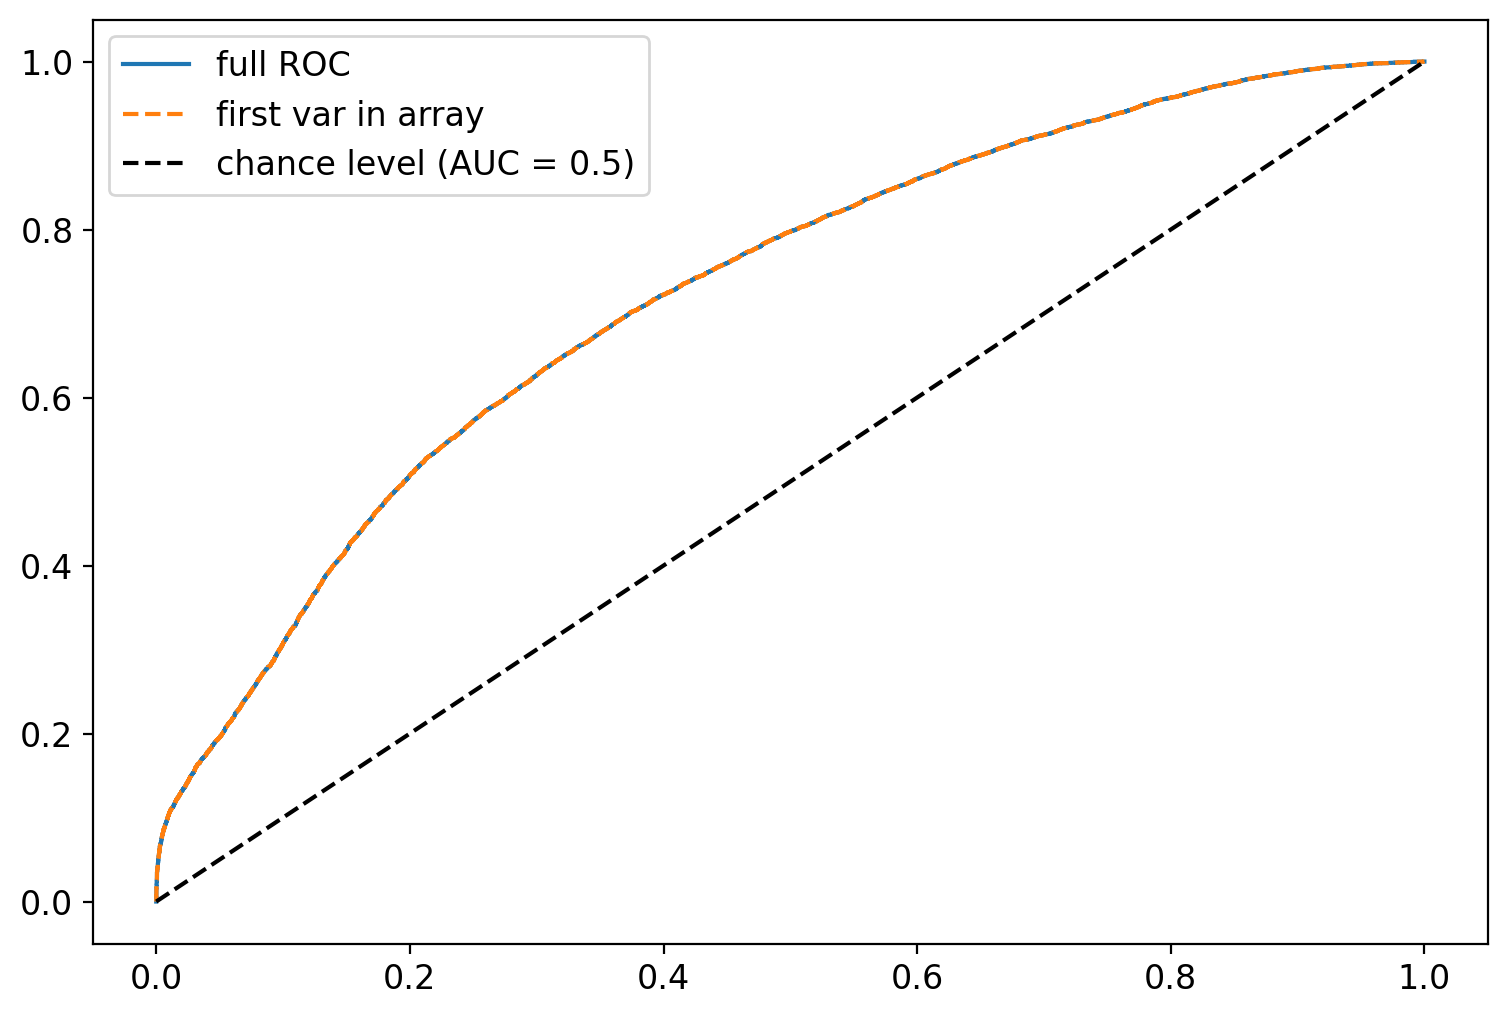

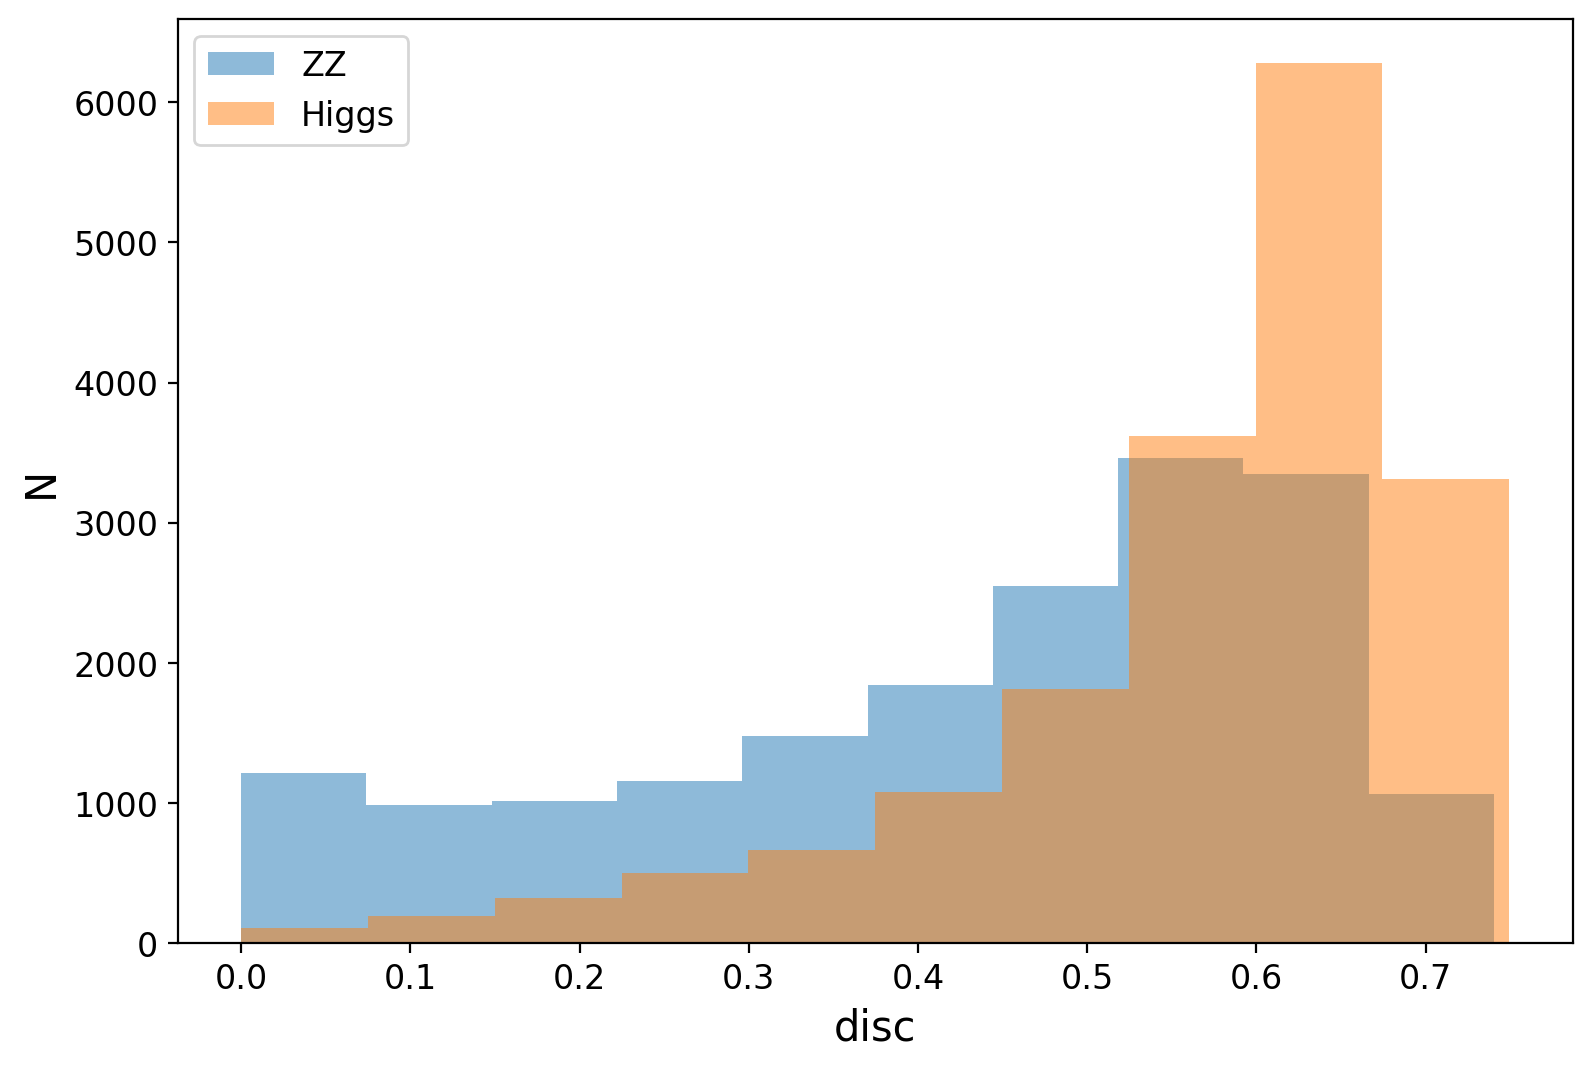

In [50]:
#>>>RUN: P12.2-runcell03

from sklearn import metrics

def drawROC(imodel,idata,ilabel):
    tmp_valid   = torch.tensor(idata).float().reshape((idata.shape))
    tmp_labelv  = torch.tensor(label_valid).float()
    valid_scores = imodel(tmp_valid)
    fpr, tpr, thresholds = metrics.roc_curve(tmp_labelv, valid_scores.detach().numpy())
    fprvar, tprvar, thresholds = metrics.roc_curve(tmp_labelv, -1*idata[:,0])
    plt.plot(fpr,tpr,label="full ROC")
    plt.plot(fprvar,tprvar,'--',label='first var in array')
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.legend()
    plt.show()

    plt.hist(valid_scores[tmp_labelv==0].detach().numpy(),label='ZZ',alpha=0.5)
    plt.hist(valid_scores[tmp_labelv==1].detach().numpy(),label='Higgs',alpha=0.5)
    plt.xlabel("disc")
    plt.ylabel("N")
    plt.legend()
    plt.show()

drawROC(model,tot_valid,label_valid)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 12.2.3</span>

In addition to the ROC we often compute the area under the curve (AUC), and an AUC of 0.5 implies no discrimination. Compute the AUC using `metrics.auc`. What is the value?

Additionally check the loss on the validation data with `iloss_func()`. Is there a sign of overtraining? To determine whether overtraining has occurred, compare with the loss on the training data, which was `0.6214`.

Report your answers as a list of two numbers with precision 1e-2: `[AUC, loss]`

In [51]:
#>>>PROBLEM: P12.2.3
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def computeAUC(imodel,idata,ilabel,iloss_func):
    tmp_valid   = torch.tensor(idata).float().reshape((idata.shape))
    tmp_labelv  = torch.tensor(label_valid).float()
    valid_scores = imodel(tmp_valid)
    fpr, tpr, thresholds = metrics.roc_curve(tmp_labelv, valid_scores.detach().numpy())
    ### Compute AUC here
    print("AUC:",metrics.auc(fpr,tpr))
    ### Compute loss here
    print("loss:",iloss_func(valid_scores.flatten(),tmp_labelv))

computeAUC(model,tot_valid,label_valid,loss_fn)

AUC: 0.7239029144636557
loss: tensor(0.6209, grad_fn=<BinaryCrossEntropyBackward0>)


<a name='section_12_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P12.3 Machine Learning for the Higgs Boson Search Part III</h2>   

| [Top](#section_12_0) | [Previous Section](#section_12_2) | [Problems](#problem_12_3) |

<h3>Overview</h3>

Now we want to apply the neural network selection to the data and make a new selection. For good measure, lets compare to the base event selection, and lets plot it.

The first plot below is the base event selection, established in previous Psets. The second plot is the selection based on our NN.

<ipython-input-32-63ceb59df8d6>:11: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
<ipython-input-32-63ceb59df8d6>:16: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
<ipython-input-32-63ceb59df8d6>:14: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
<ipython-input-32-63ceb59df8d6>:13: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
<ipython-input-32-63ceb59df8d6>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-32-63ceb59df8d6>:10: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
<ipython-i

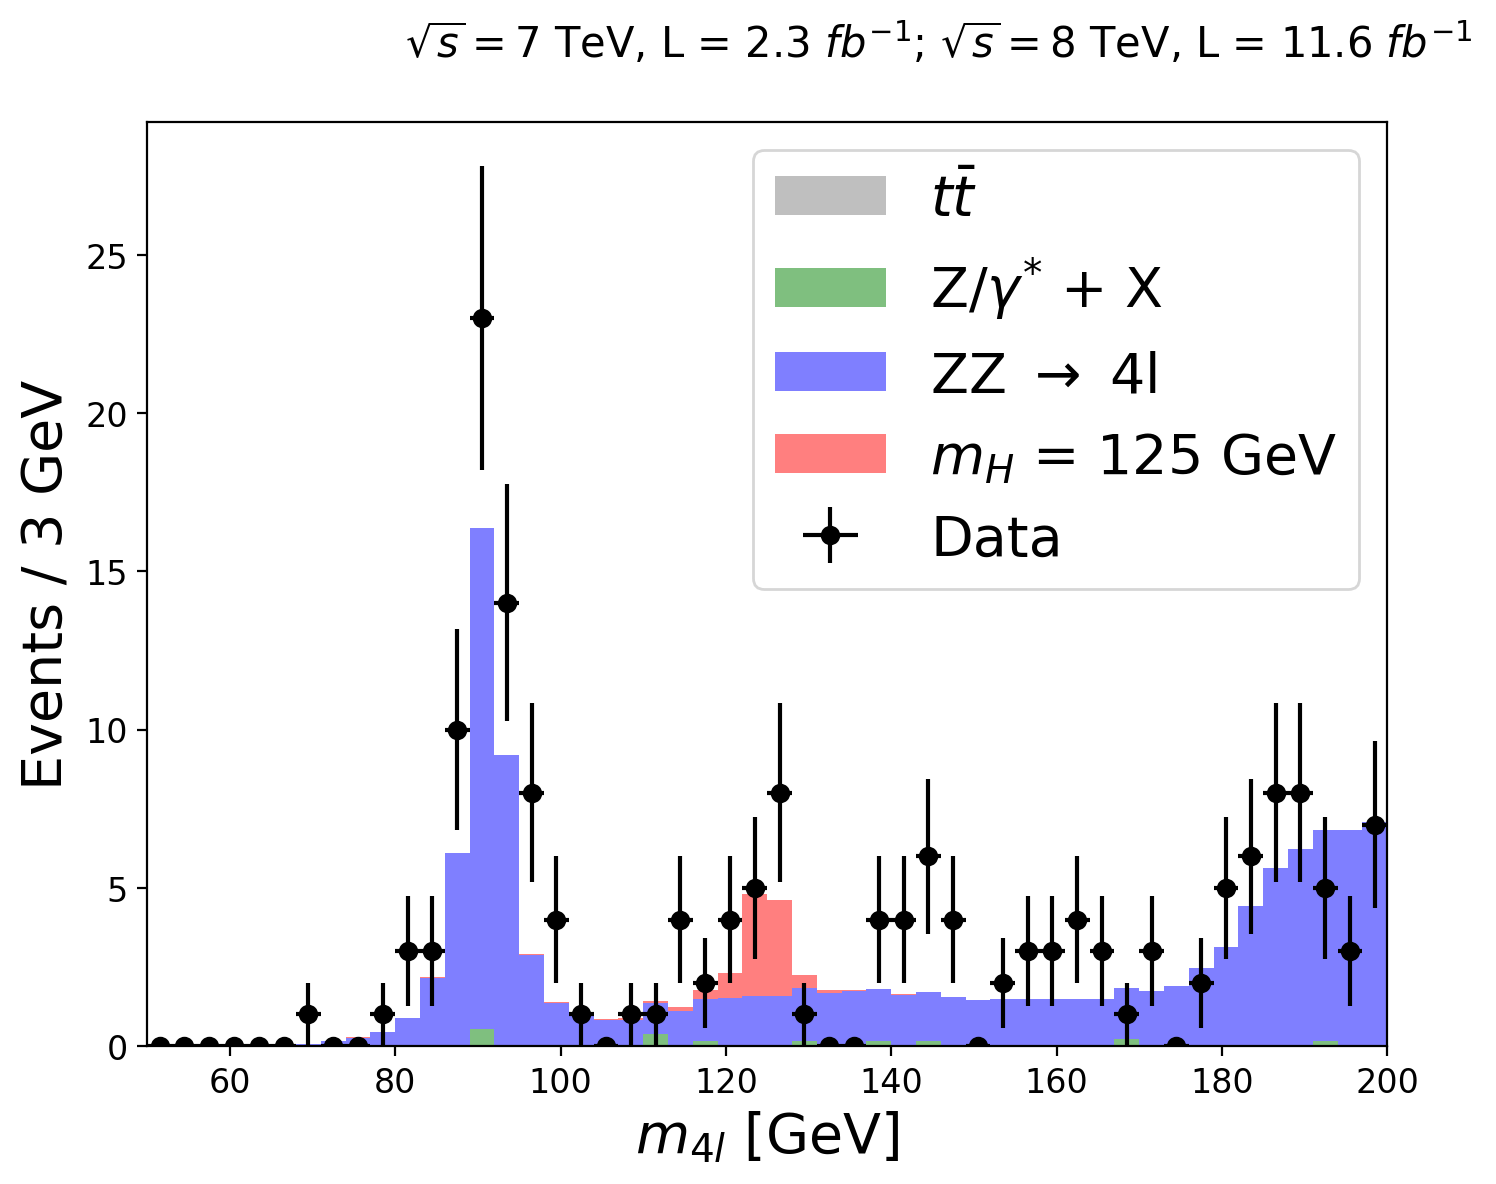

<ipython-input-32-63ceb59df8d6>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-32-63ceb59df8d6>:10: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
<ipython-input-32-63ceb59df8d6>:16: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
<ipython-input-32-63ceb59df8d6>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-32-63ceb59df8d6>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-32-63ceb59df8d6>:14: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
<ipython-i

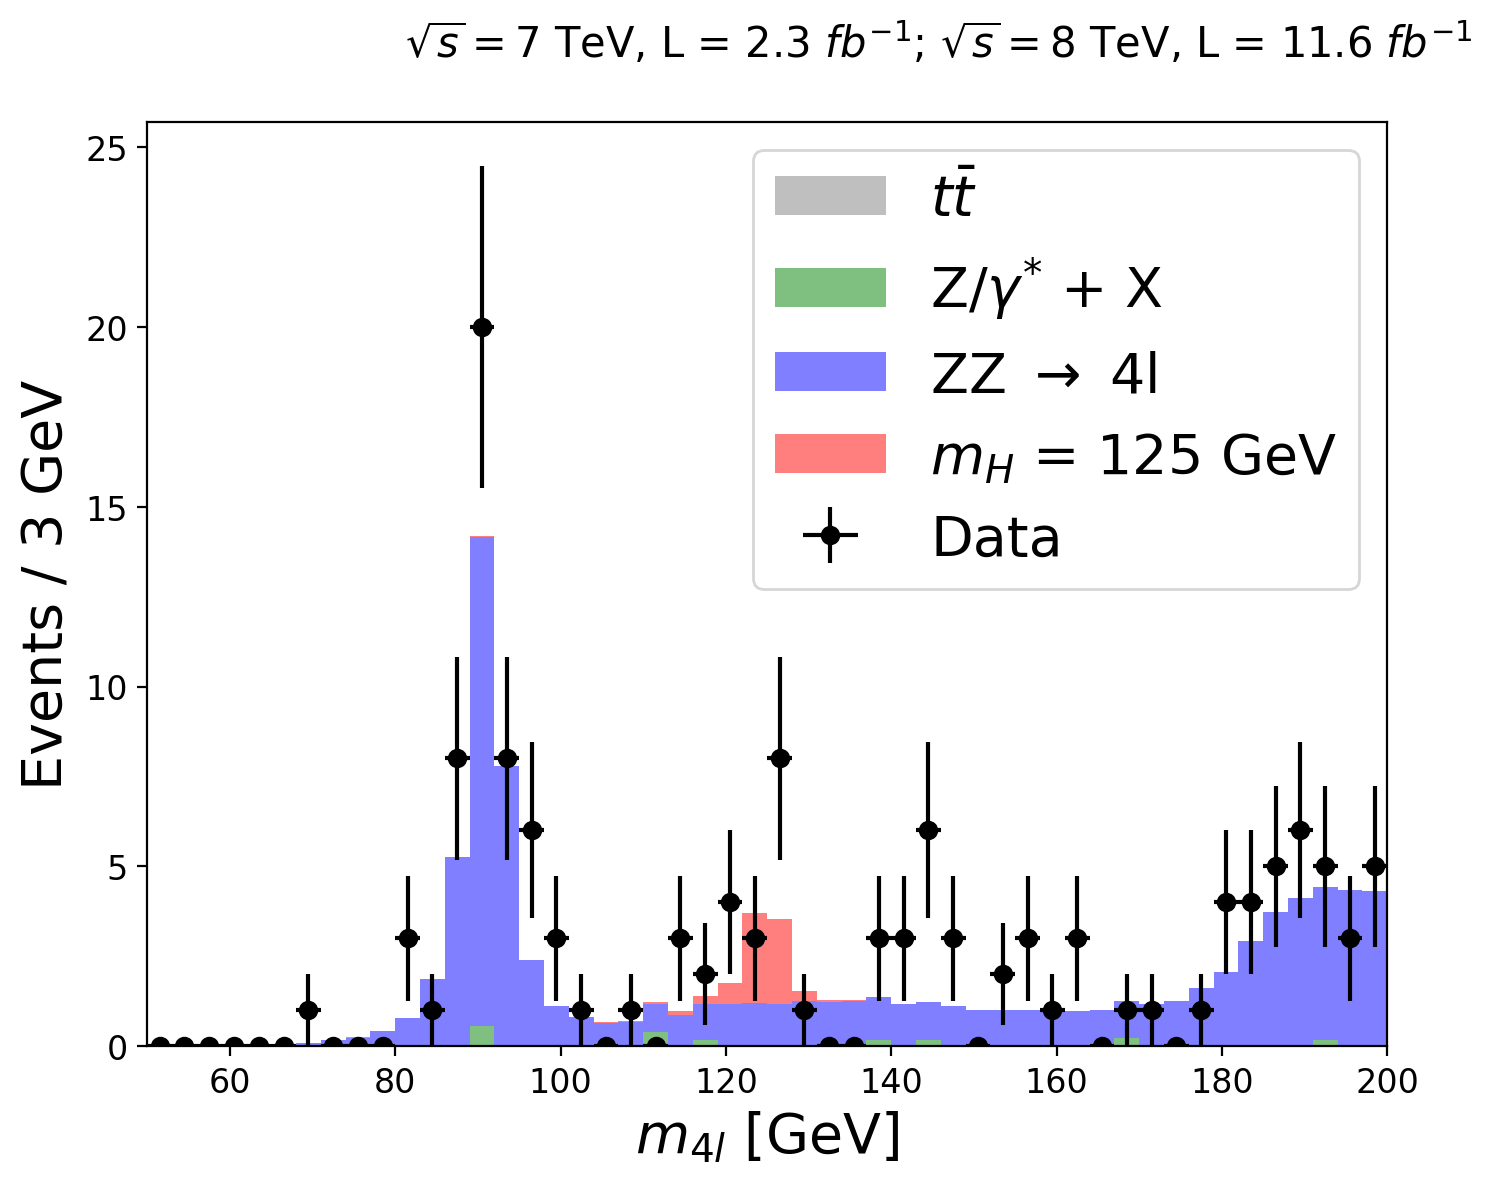

In [52]:
#>>>RUN: P12.3-runcell01

def evtselnn(lis,iVar=['E1'],nndisc=0.5):   ### Similar as the Function: objsel shown above
    pidvars=['PID1','PID2','PID3','PID4']
    pids=lis[pidvars].values
    leptoncharge=np.sum(pids,1)
    nninputs= torch.tensor(lis[iVar].values).float().reshape(len(lis),len(iVar))
    nnscore = model(nninputs)
    pass_evt = np.logical_and((nnscore.detach().flatten() > nndisc), (leptoncharge == 0))
    lis['PassEvtNN'] = pass_evt

def setupMCAll(iquery='PassObj == 1 and PassEvt == 1',iVars=['E1'],nndisc=0.5):
    mc_all,mc_sig,mc_bkg_zz,mc_bkg_dy,mc_bkg_tt=loadMC()
    for i,bkg in enumerate(mc_all):
        for j,pro in enumerate(bkg):
            objsel(pro)
            evtsel(pro)
            evtselnn(pro,iVars,nndisc)
            mc_all[i][j] = pro.query(iquery)
    return mc_all

objsel(data)
evtsel(data)
evtselnn(data)

#base event selection
sel_data = data.query('PassObj == 1 and PassEvt == 1')
mc_all = setupMCAll('PassObj == 1 and PassEvt == 1')
hist_mc,hist_data=makeAllHists(sel_data,mc_all)
plotHists(hist_mc,hist_data)

#NN event selection
sel_data = data.query('PassObj == 1 and PassEvt == 1 and PassEvtNN == 1')
mc_all = setupMCAll('PassObj == 1 and PassEvt == 1 and PassEvtNN == 1')
hist_mc,hist_data=makeAllHists(sel_data,mc_all)
plotHists(hist_mc,hist_data)

<a name='problem_12_3'></a>     

| [Top](#section_12_0) | [Restart Section](#section_12_3) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 12.3.1</span>

Take a careful look at the preceding plots. What is the neural network doing here? Select only one answer from the following options:

A) The NN has done nothing.\
B) The NN reduces the low mass region.\
C) The NN reduces the high mass region.\
D) The NN flattens the signal uniformly.\
E) The NN clearly enhances the Higgs signal.\
F) The NN clearly supresses the Higgs signl.

<h3>An Open Ended Task (Question at the End)</h3>

Let's finally put everything together and train with more variables. This will be slightly open-ended, and we only ask one question at the end, in order to consider if you can find any improvements. **We encourage you to share your work on the discussion forum and communicate with your peers about what you have tried.**

In what follows you will:

- Construct your own NN discriminator with variables you like (for instance, in the cell below, we provide an option to use many more variables).
- Define and train the network
- Examine the ROC
- Plot the histogram
- Compute the significance

In [53]:
#>>>RUN: P12.3-runcell02

vars  =['px1','py1','eta1','phi1','PID1']
vars +=['px2','py2','eta2','phi2','PID2']
vars +=['px3','py3','eta2','phi3','PID3']
vars +=['px4','py4','eta2','phi4','PID4']

tot_train, tot_valid, label_train, label_valid=prepDataSets(vars)
print(tot_train.shape)

<ipython-input-32-63ceb59df8d6>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-32-63ceb59df8d6>:10: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
<ipython-input-32-63ceb59df8d6>:16: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
<ipython-input-32-63ceb59df8d6>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-32-63ceb59df8d6>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-32-63ceb59df8d6>:14: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
<ipython-i

[-52.4286    -13.5671      2.35206   ...  -0.591687    0.0791574
 -13.       ] 2402600
20 ['px1', 'py1', 'eta1', 'phi1', 'PID1', 'px2', 'py2', 'eta2', 'phi2', 'PID2', 'px3', 'py3', 'eta2', 'phi3', 'PID3', 'px4', 'py4', 'eta2', 'phi4', 'PID4']
(84091, 20)


<h3>Define the Network and Train</h3>

Construct your own neural network architecture and train you neural network. **Write your code in the following cells.**

See the solution of Problem 12.3.2 for an example NN that we defined.

In [66]:
import torch
import torch.nn as nn

class MLP2(nn.Module):
    def __init__(self, input_dim):
        super(MLP2, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),  # Adjust the number of neurons as needed
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.PReLU(),
            nn.Linear(32, 32),
            nn.PReLU(),
            nn.Linear(32, input_dim),
            nn.ReLU(),
            nn.Linear(input_dim,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layers(x)
        return x

def train(x, y, net, loss_func, opt, nepochs):
    net.train(True)
    for epoch in range(nepochs):
        prediction = net(x)
        opt.zero_grad()
        loss = loss_func(prediction.flatten(), y)
        loss.backward()
        opt.step()

        if epoch % 100 == 0:
            # Split by signal and background
            sig_prediction = prediction[y.flatten() == 1]
            bkg_prediction = prediction[y.flatten() == 0]
            # Now we are going to make a prediction metric for the accuracy
            correct  = (sig_prediction > 0.5).sum().item()  # n sig correct
            correct += (bkg_prediction < 0.5).sum().item()  # n bkg correct
            total   = y.size(0)
            accuracy = 100 * correct / total
            print('[%d] loss: %.4f accuracy: %.4f' % (epoch + 1, loss.item(), accuracy))
    return

# Assuming tot_train is your training data and label_train are the labels
input_dim = tot_train.shape[1]  # Get the number of features

model = MLP2(input_dim)

# Training setup
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.BCELoss()
tmp_tot = torch.tensor(tot_train).float()
tmp_label = torch.tensor(label_train).float()

# Train the model
train(tmp_tot, tmp_label, model, loss_fn, optimizer, 1500)

[1] loss: 0.6875 accuracy: 48.8066
[101] loss: 0.4487 accuracy: 76.3613
[201] loss: 0.3905 accuracy: 80.2083
[301] loss: 0.3260 accuracy: 84.9508
[401] loss: 0.2820 accuracy: 87.2543
[501] loss: 0.2501 accuracy: 88.8395
[601] loss: 0.2322 accuracy: 89.6362
[701] loss: 0.2200 accuracy: 90.1547
[801] loss: 0.2095 accuracy: 90.6482
[901] loss: 0.2019 accuracy: 90.8409
[1001] loss: 0.1944 accuracy: 91.3534
[1101] loss: 0.1888 accuracy: 91.5437
[1201] loss: 0.1847 accuracy: 91.8315
[1301] loss: 0.1818 accuracy: 91.9361
[1401] loss: 0.1784 accuracy: 92.0931


<h3>Examine the ROC</h3>

Now run your own selection with your updated neural network, and look at the ROC, be sure to cut on the discriminator value that is reasonable.

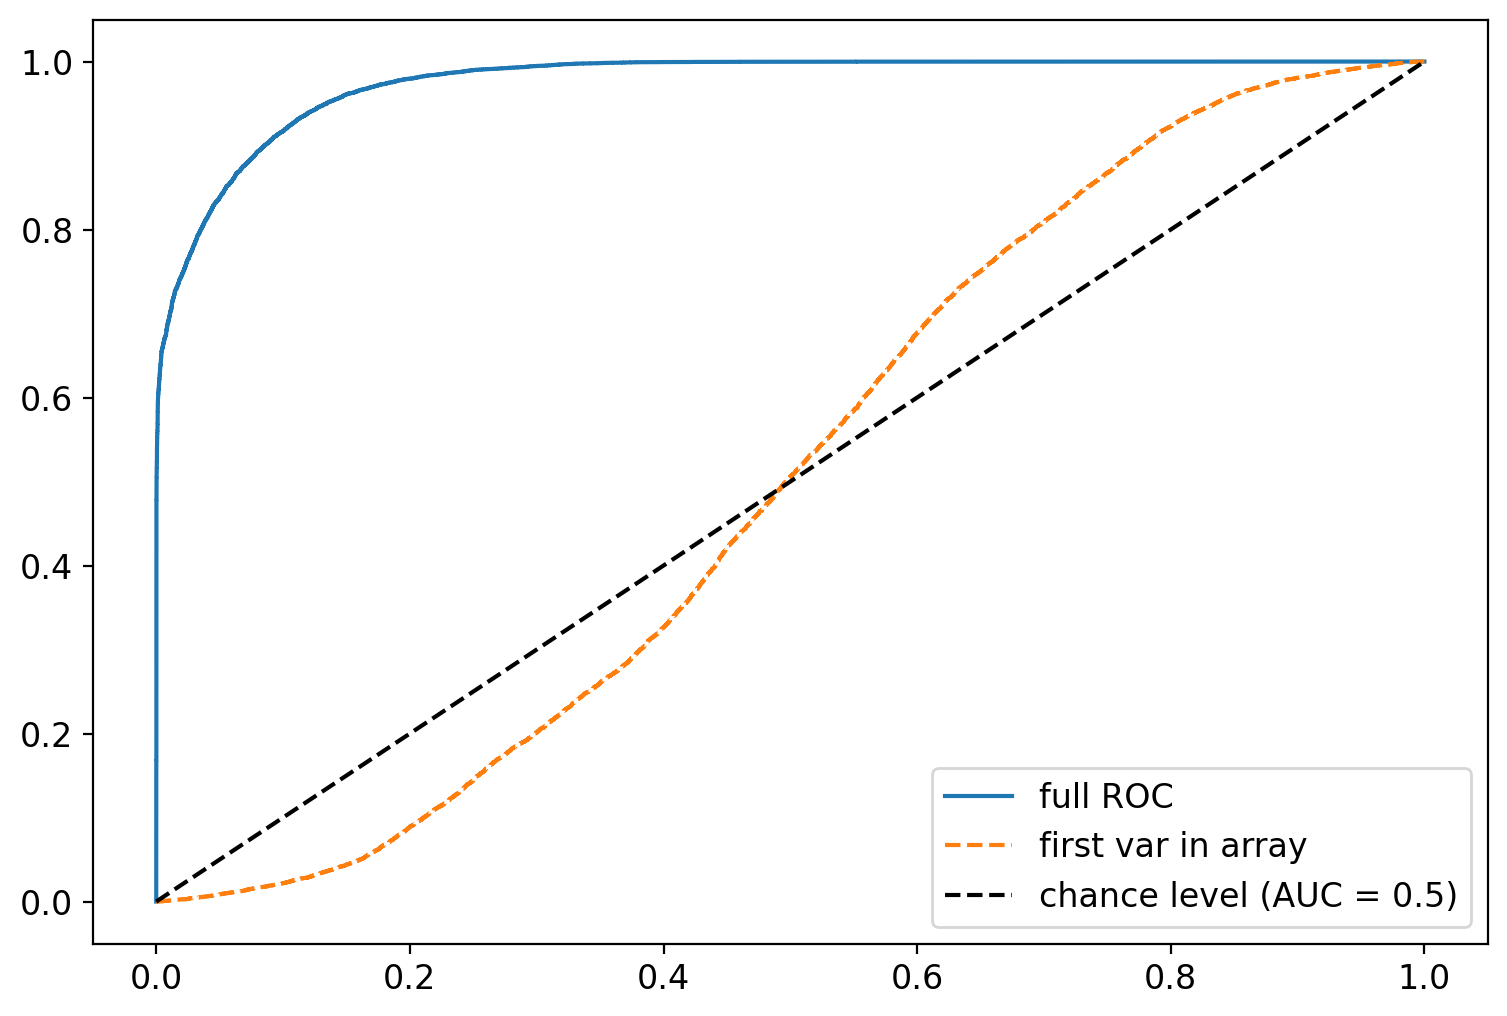

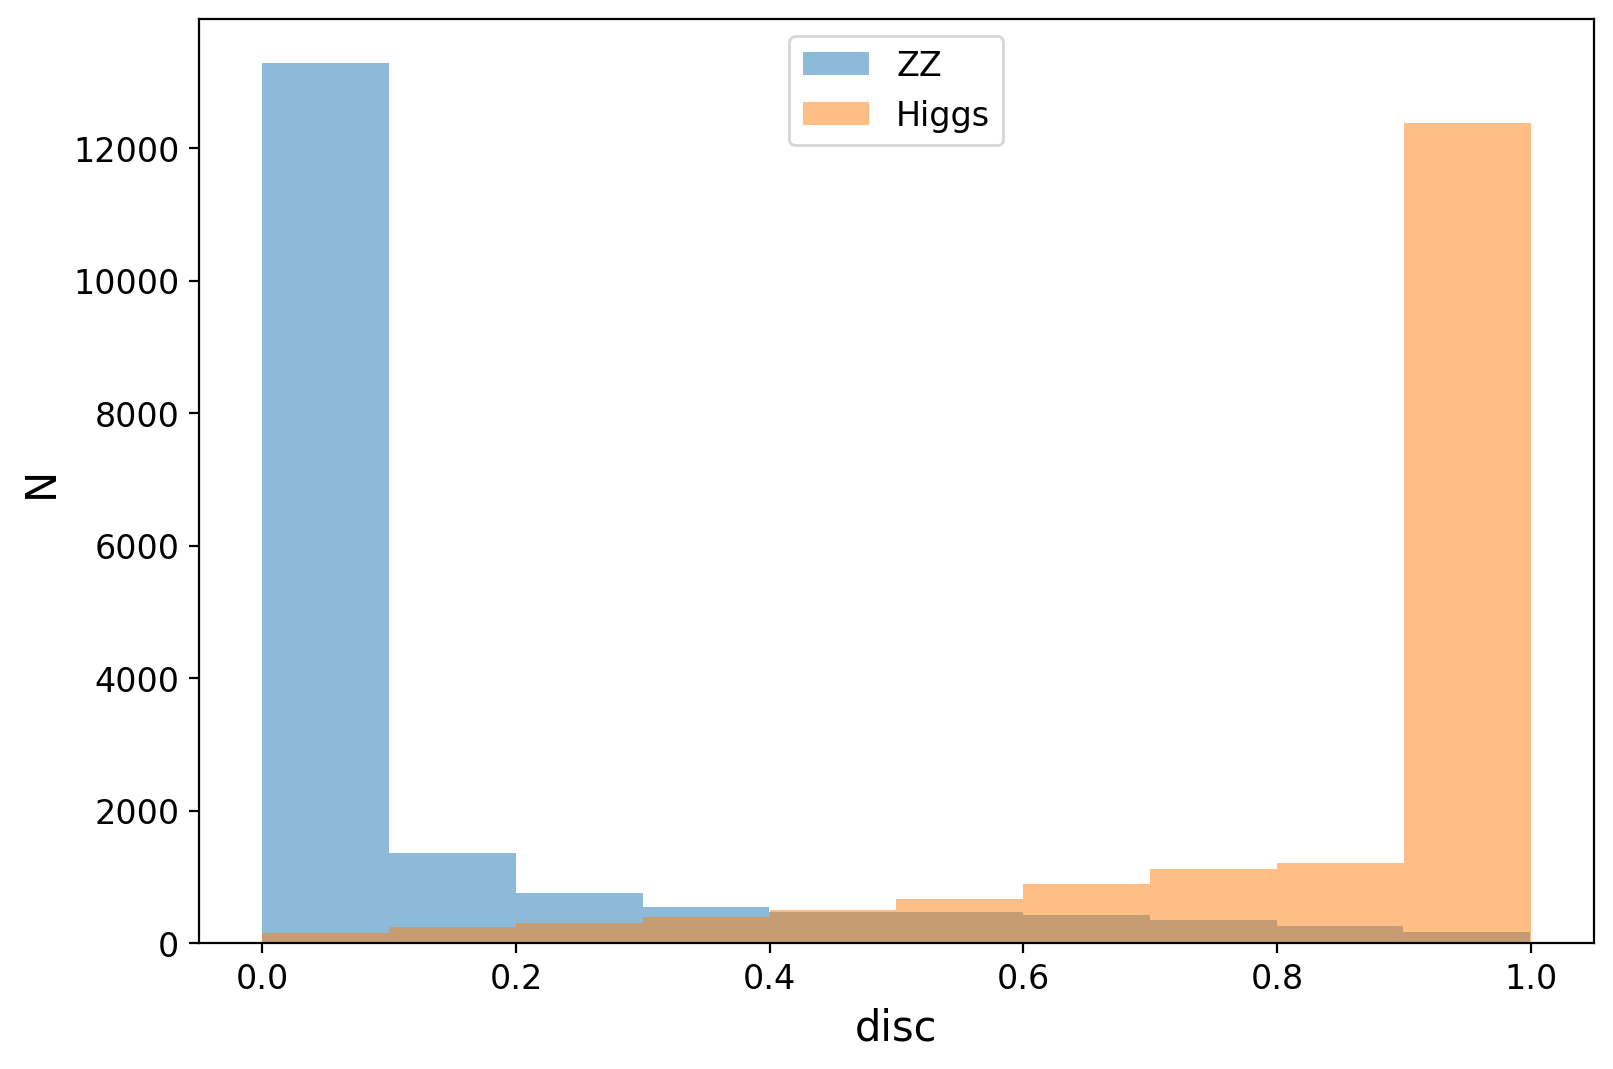

<ipython-input-32-63ceb59df8d6>:11: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
<ipython-input-32-63ceb59df8d6>:16: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
<ipython-input-32-63ceb59df8d6>:14: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
<ipython-input-32-63ceb59df8d6>:13: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
<ipython-input-32-63ceb59df8d6>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-32-63ceb59df8d6>:10: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
<ipython-i

In [67]:
#>>>RUN: P12.3-runcell04

drawROC(model,tot_valid,label_valid)
objsel(data)
evtsel(data)
evtselnn(data,vars,nndisc=0.5)
sel_data = data.query('PassObj == 1 and PassEvt == 1 and PassEvtNN == 1')
mc_all = setupMCAll('PassObj == 1   and PassEvt == 1 and PassEvtNN == 1',vars,nndisc=0.5)

<h3>Plot the Histogram</h3>

Let's make a plot and see how it looks. Where is the neural network removing events?

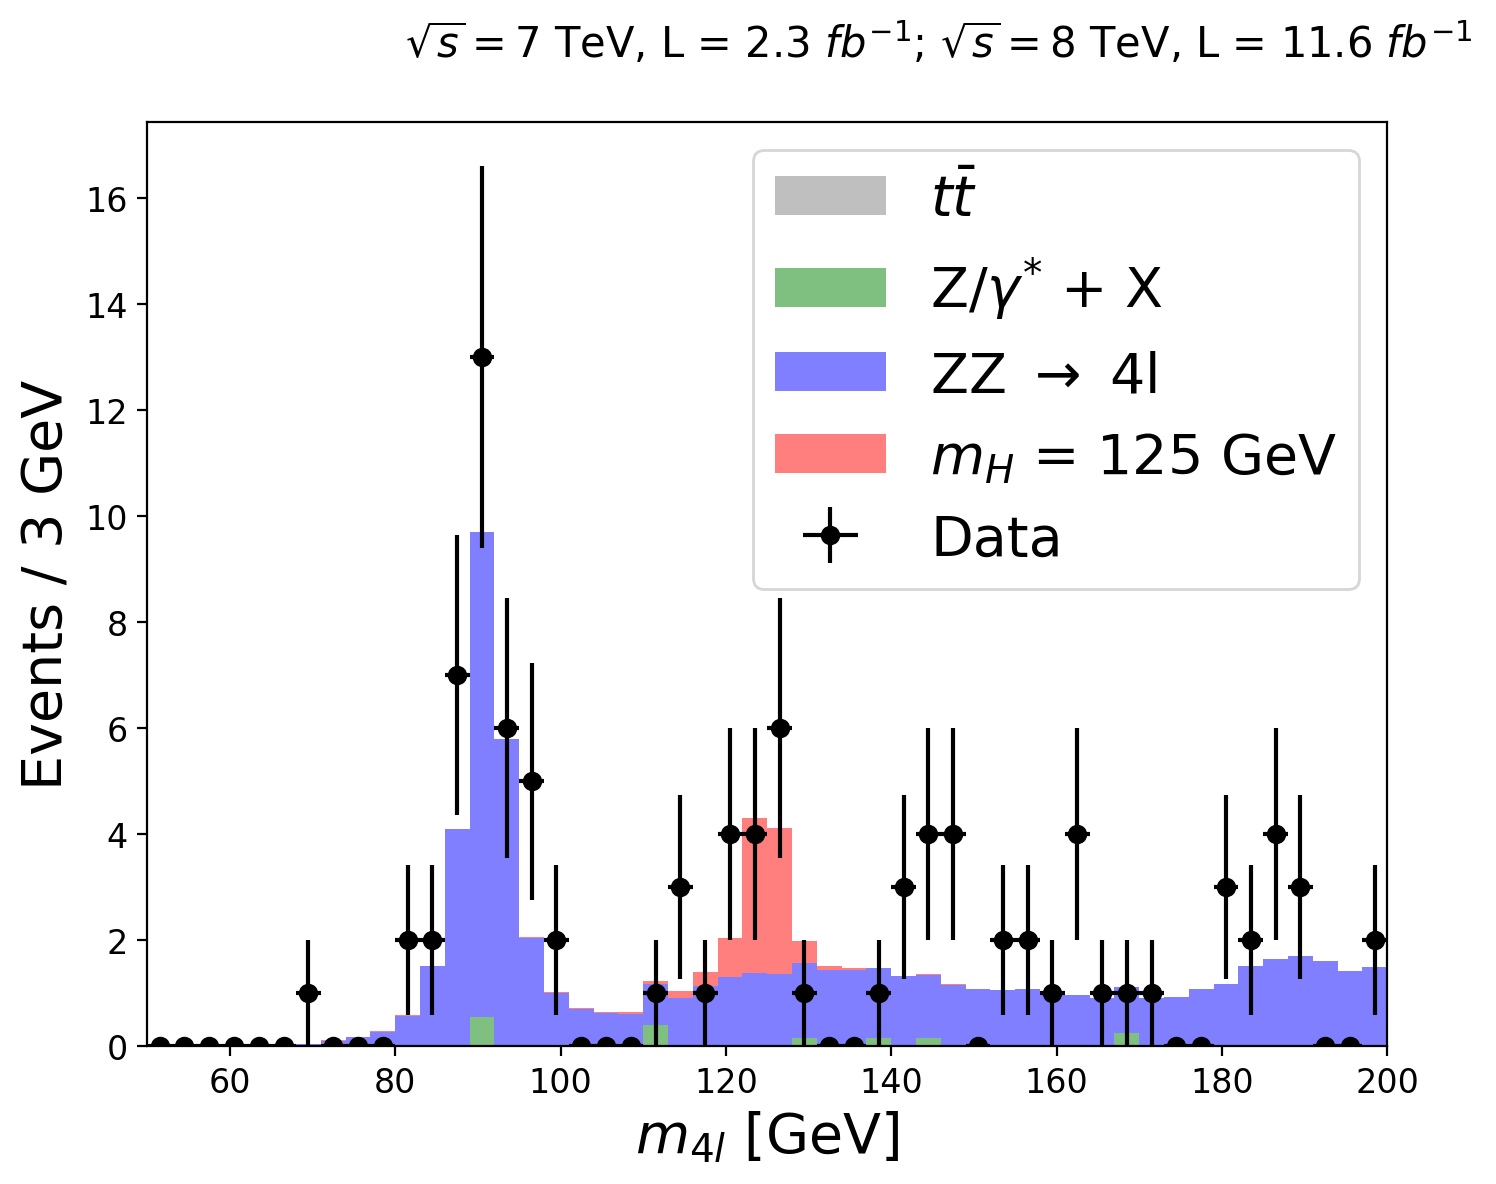

In [68]:
#>>>RUN: P12.3-runcell05

hist_mc,hist_data=makeAllHists(sel_data,mc_all)
plotHists(hist_mc,hist_data)

<h3>Compute the Significance</h3>

Finally, compute the significance using the code that we defined previously. For this, we will have to rebuild the signal and background splines from the last Pset, and then look at the variation over mass.

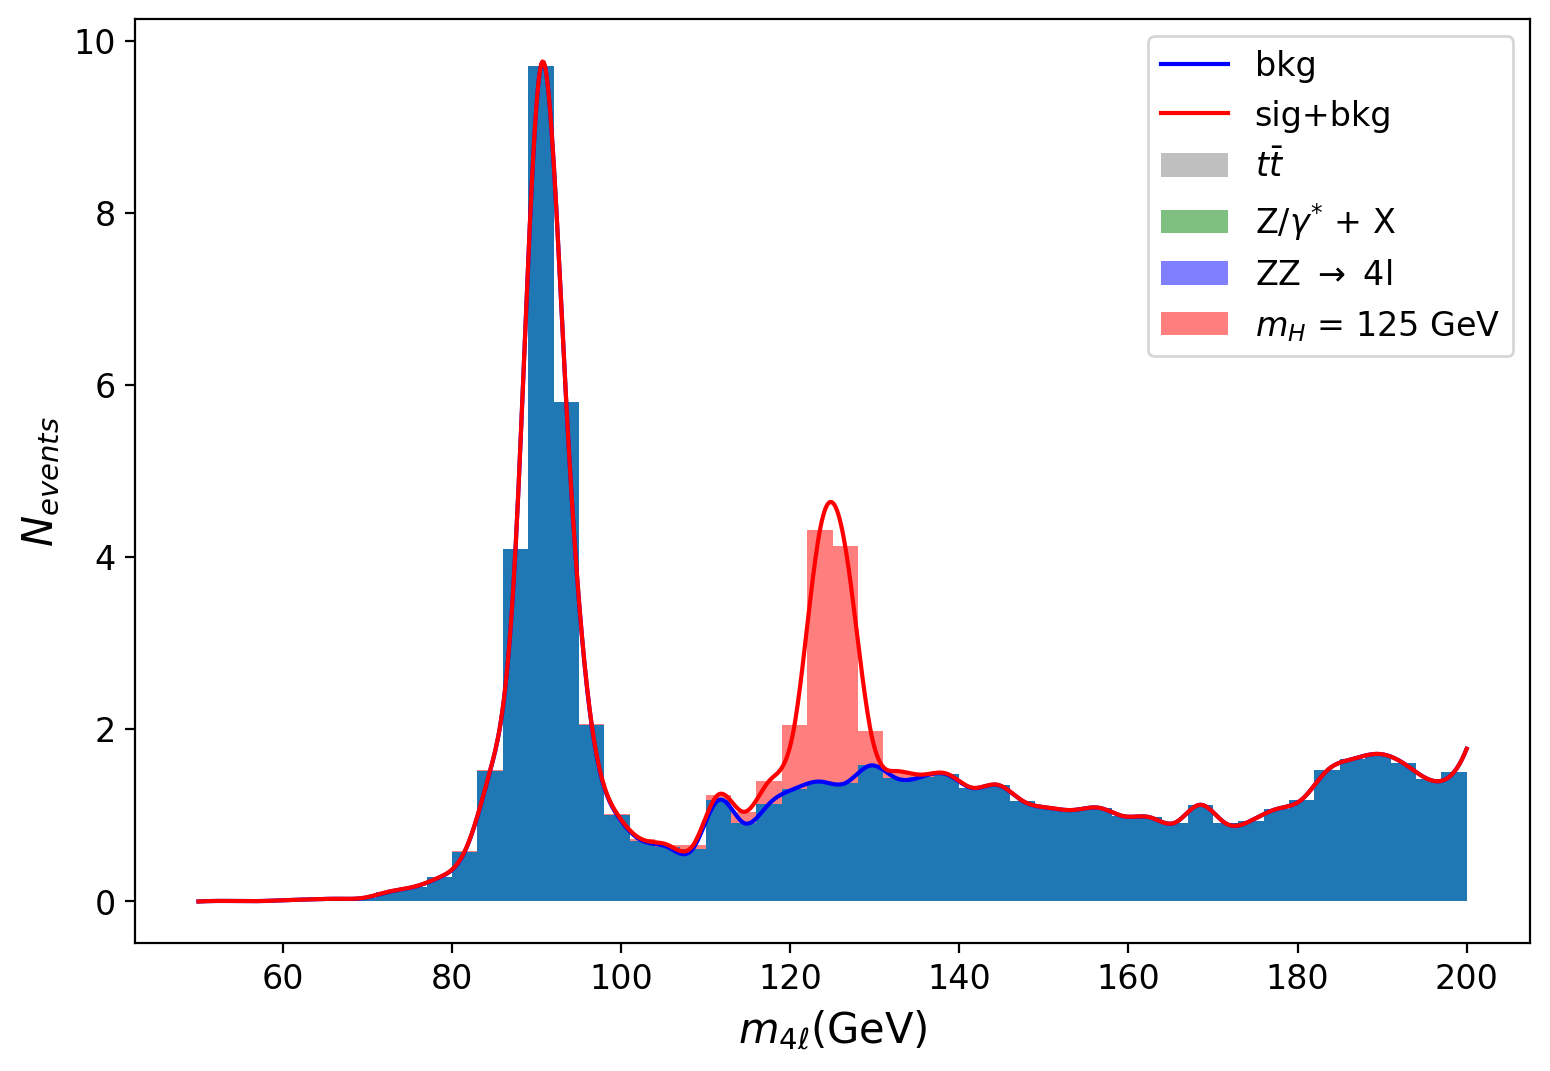

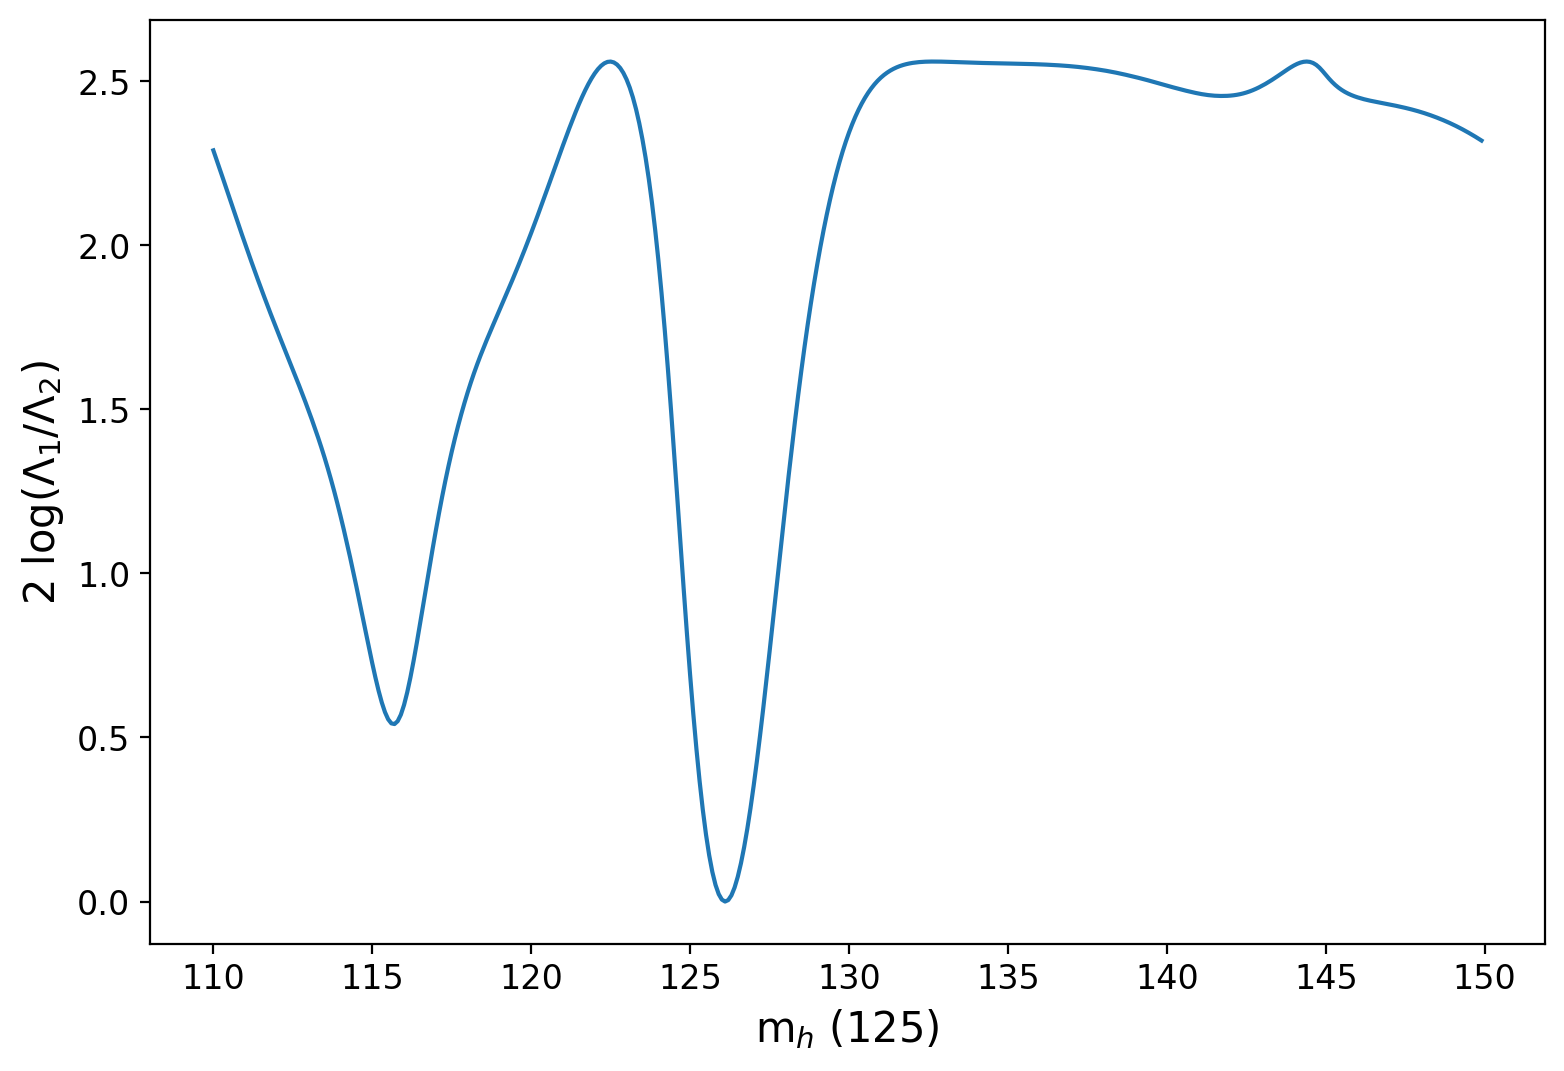

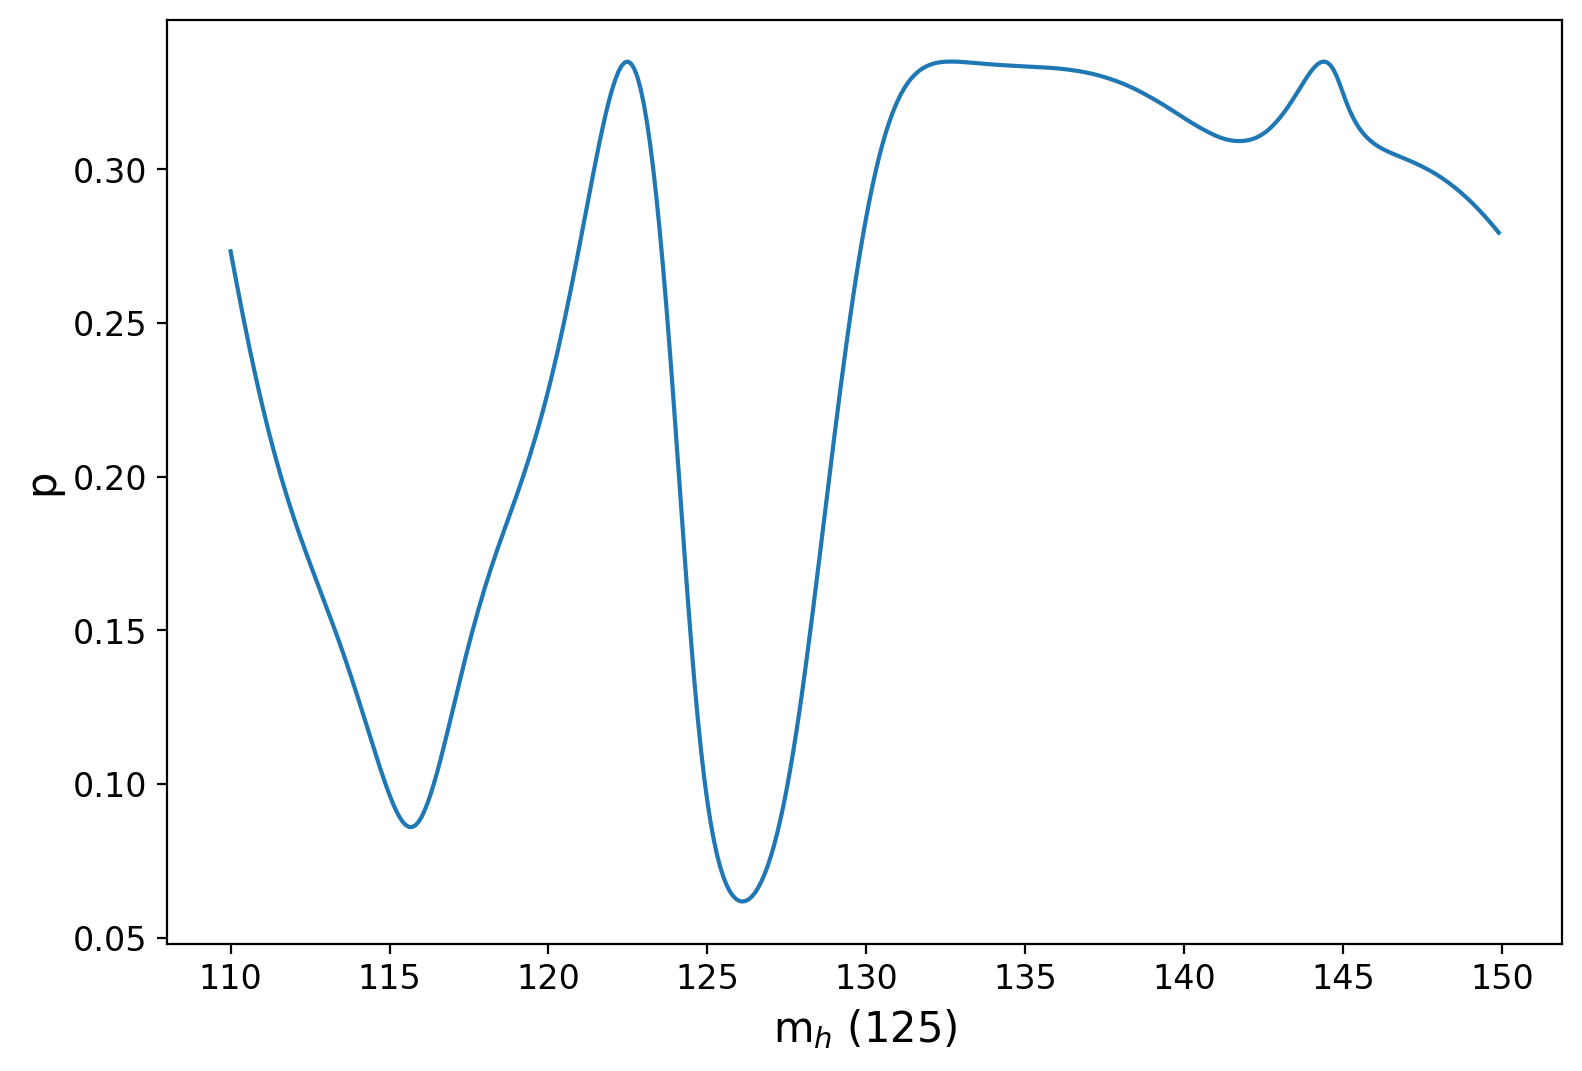

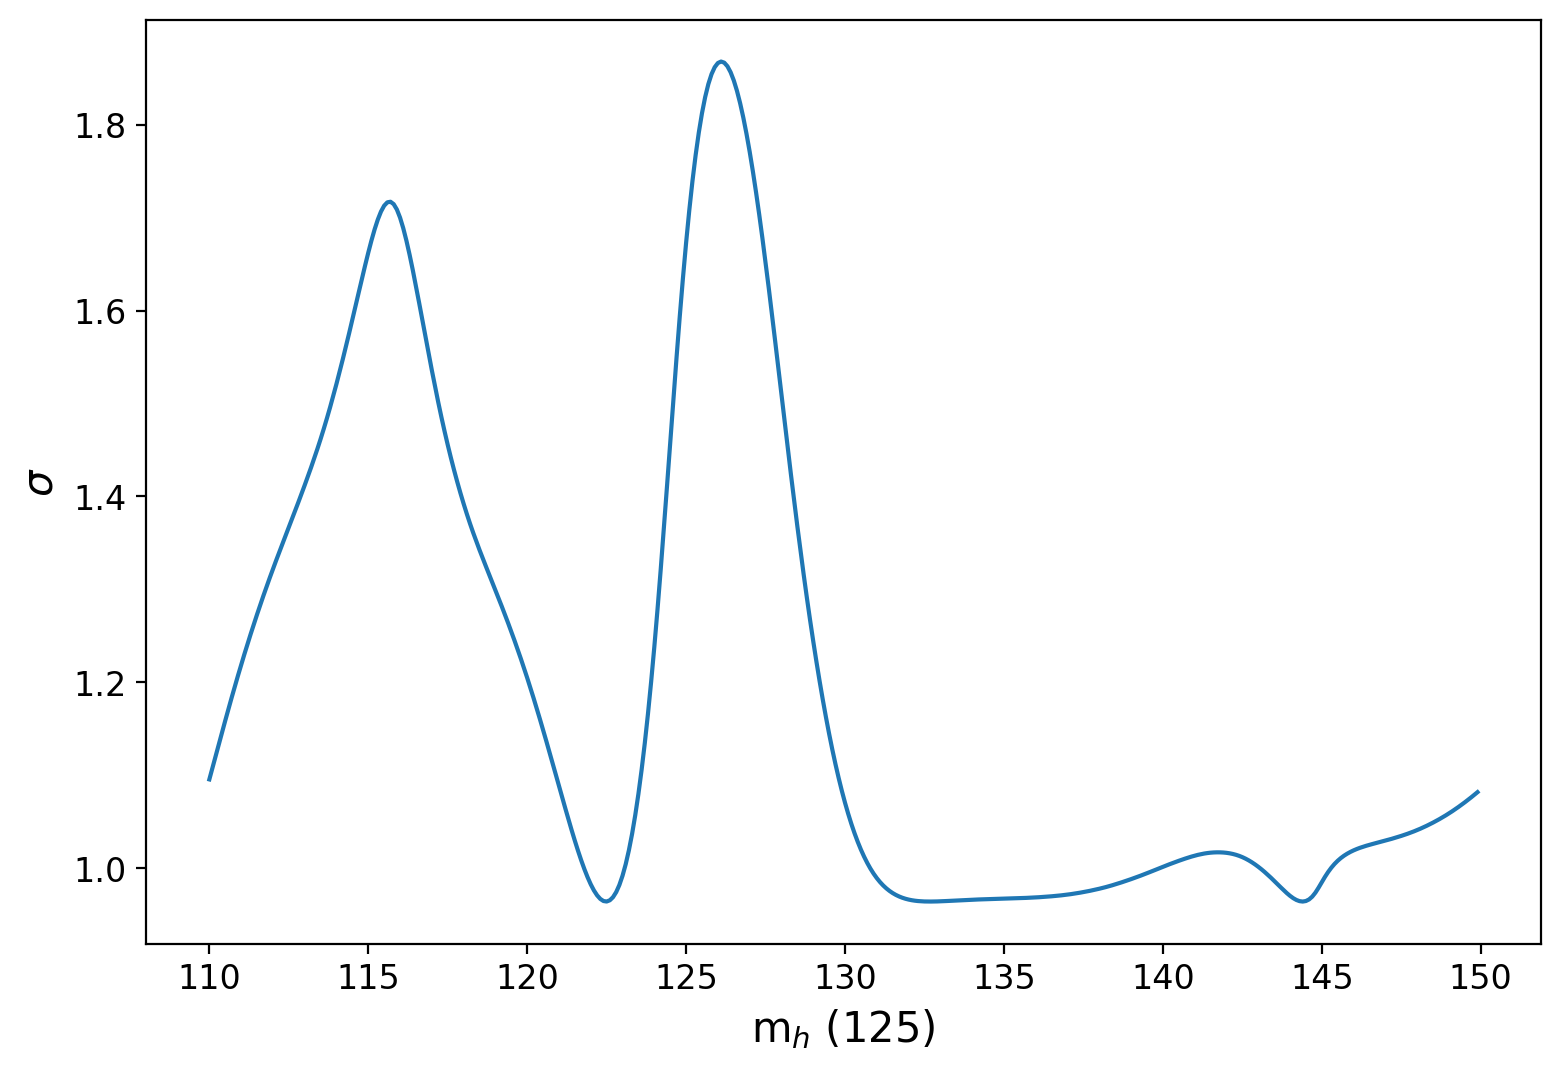

Mass window is: [124.76354073230466, 127.76491379530454] Best fit: 126.09999999999908 +/- 1.5006865314999374


In [69]:
#>>>RUN: P12.3-runcell06

sig_interpolate,bkg_interpolate=setupSpline(hist_mc)
chi2bkg=fithistograms(125,hist_data,shiftbkg)
mhscan,NLLs,pscan=massscan(sigbkg,plot=True)

mass(mhscan,NLLs,124,130)

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 12.3.2</span>

How does the Higgs significance using the new NN compare to our earlier discoveries?

A) This fit shows a more significant Higgs peak.\
B) This fit shows an equally or less significant Higgs peak.